In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import warnings
import itertools
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [2]:
date_parser = lambda c: pd.to_datetime(c, format='%d/%m/%Y %H:%M:%S', errors='coerce')
data = pd.read_csv('/Users/ashok/Downloads/ITSM_data.csv', parse_dates=['Open_Time','Reopen_Time','Close_Time','Resolved_Time'])

/Users/ashok/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46606 entries, 0 to 46605
Data columns (total 26 columns):
CI_Name                       46606 non-null object
CI_Cat                        46495 non-null object
CI_Subcat                     46495 non-null object
WBS                           46606 non-null object
Incident_ID                   46606 non-null object
Status                        46606 non-null object
Impact                        46606 non-null object
Urgency                       46606 non-null object
Priority                      45226 non-null float64
Unnamed: 9                    46606 non-null float64
Category                      46606 non-null object
KB_number                     46606 non-null object
Alert_Status                  46606 non-null object
No_of_Reassignments           46605 non-null float64
Unnamed: 14                   46606 non-null int64
Open_Time                     46606 non-null datetime64[ns]
Reopen_Time                   2284 non-null datet

In [4]:
selected = data.loc[:,['Open_Time','Incident_ID','CI_Name','CI_Cat','CI_Subcat','WBS','Category','Priority']]

In [5]:
selected.dropna(inplace=True)

In [6]:
selected.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45118 entries, 0 to 46605
Data columns (total 8 columns):
Open_Time      45118 non-null datetime64[ns]
Incident_ID    45118 non-null object
CI_Name        45118 non-null object
CI_Cat         45118 non-null object
CI_Subcat      45118 non-null object
WBS            45118 non-null object
Category       45118 non-null object
Priority       45118 non-null float64
dtypes: datetime64[ns](1), float64(1), object(6)
memory usage: 3.1+ MB


In [7]:
selected['Date'] = selected['Open_Time'].apply(lambda x: x.date() )

In [8]:
selected.Date[0]

datetime.date(2012, 5, 2)

In [9]:
selected['No_Incidents']=selected.groupby('Date')['Incident_ID'].transform('count')

In [11]:
incfrq = selected.loc[:,['Date','No_Incidents']]

In [17]:
incfrq.head()

,Date,No_Incidents
0,2012-05-02,1
1,2012-12-03,1
3,2012-07-17,1
4,2012-10-08,2
5,2012-10-08,2


In [18]:
incfrq.drop_duplicates(inplace=True)

In [19]:
incfrq.shape

(326, 2)

In [20]:
incfrq.head()

,Date,No_Incidents
0,2012-05-02,1
1,2012-12-03,1
3,2012-07-17,1
4,2012-10-08,2
6,2012-08-15,1


In [21]:
incfrq = incfrq.set_index('Date')
incfrq.index = pd.to_datetime(incfrq.index)
incfrq.index

DatetimeIndex(['2012-05-02', '2012-12-03', '2012-07-17', '2012-10-08',
               '2012-08-15', '2012-08-22', '2012-03-09', '2012-09-21',
               '2012-01-10', '2012-02-10',
               ...
               '2014-03-22', '2014-03-24', '2014-03-23', '2014-03-25',
               '2014-03-26', '2014-03-27', '2014-03-28', '2014-03-29',
               '2014-03-30', '2014-03-31'],
              dtype='datetime64[ns]', name='Date', length=326, freq=None)

In [22]:
incfrq.head()

,No_Incidents
Date,
2012-05-02,1
2012-12-03,1
2012-07-17,1
2012-10-08,2
2012-08-15,1


In [23]:
print(incfrq.index.min(),"to",incfrq.index.max())

2012-01-10 00:00:00 to 2014-12-03 00:00:00


In [24]:
data = incfrq['No_Incidents']
data = data.asfreq('D')
data.index

DatetimeIndex(['2012-05-02', '2012-05-03', '2012-05-04', '2012-05-05',
               '2012-05-06', '2012-05-07', '2012-05-08', '2012-05-09',
               '2012-05-10', '2012-05-11',
               ...
               '2014-03-22', '2014-03-23', '2014-03-24', '2014-03-25',
               '2014-03-26', '2014-03-27', '2014-03-28', '2014-03-29',
               '2014-03-30', '2014-03-31'],
              dtype='datetime64[ns]', name='Date', length=699, freq='D')

In [25]:
data.head()

Date
2012-05-02    1.0
2012-05-03    NaN
2012-05-04    NaN
2012-05-05    NaN
2012-05-06    NaN
Freq: D, Name: No_Incidents, dtype: float64

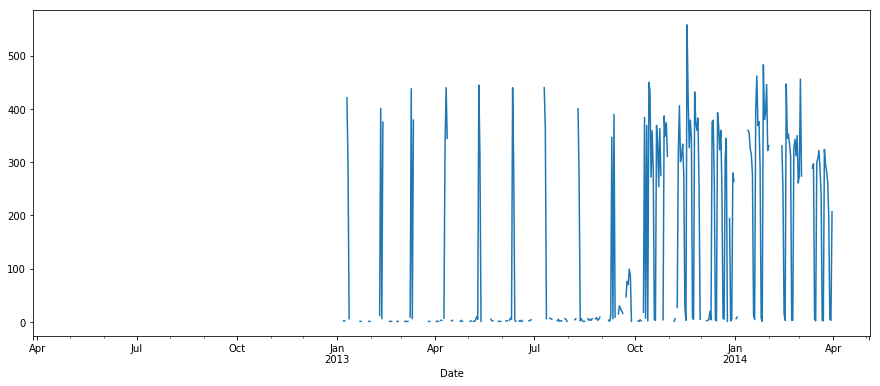

In [28]:
data.plot(figsize=(15, 6))
plt.show()

In [35]:
incfrom2013 = incfrq[incfrq.index > dt.datetime(2013,10,1)]

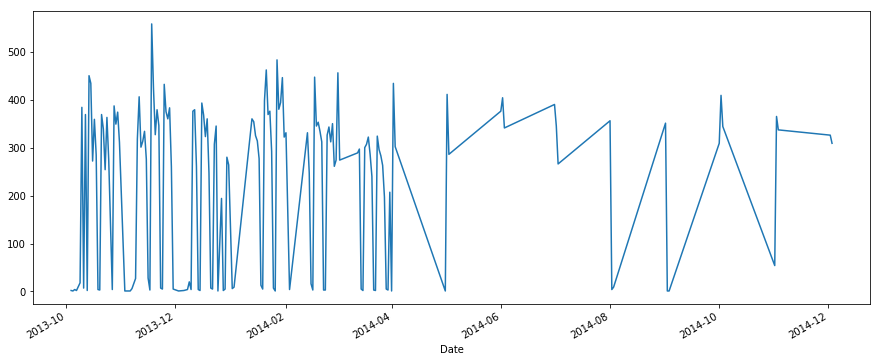

In [36]:
data= incfrom2013['No_Incidents']
data.plot(figsize=(15, 6))
plt.show()

In [37]:
data = data.asfreq('D')
data.index

DatetimeIndex(['2013-11-03', '2013-11-04', '2013-11-05', '2013-11-06',
               '2013-11-07', '2013-11-08', '2013-11-09', '2013-11-10',
               '2013-11-11', '2013-11-12',
               ...
               '2014-03-22', '2014-03-23', '2014-03-24', '2014-03-25',
               '2014-03-26', '2014-03-27', '2014-03-28', '2014-03-29',
               '2014-03-30', '2014-03-31'],
              dtype='datetime64[ns]', name='Date', length=149, freq='D')

In [38]:
# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 2)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [39]:
warnings.filterwarnings("ignore") # specify to ignore warning messages

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(data,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:1564.6056475451178
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:1426.198858307624
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:1435.8096774706412
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:1195.9860193653576
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:1422.7733181311157
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:1375.114448747672
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:1241.2110580294127
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:1196.694049991835
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:1481.7002859629583
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:1343.4255172881253
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:1380.8752850577575
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:1155.8192755494354
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:1367.6948695254823
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:1327.831143571539
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:1210.6304173857654
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:1157.3662246903327
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:1474.7870772466108
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:1347.6174247903

In [40]:
mod = sm.tsa.statespace.SARIMAX(data,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4231      0.154      2.740      0.006       0.121       0.726
ma.L1         -1.0000    214.459     -0.005      0.996    -421.332     419.332
ar.S.L12      -0.0601      0.086     -0.701      0.483      -0.228       0.108
ma.S.L12      -1.0001    214.475     -0.005      0.996    -421.364     419.364
sigma2      2.222e+04      0.004    6.1e+06      0.000    2.22e+04    2.22e+04


In [ ]:
results.plot_diagnostics(figsize=(15, 12))
plt.show()

In [53]:
pred = results.get_prediction(start=pd.to_datetime('2014-2-3'), end=pd.to_datetime('2014-5-30'),dynamic=False)
pred_ci = pred.conf_int()

In [54]:
pred.predicted_mean.round()

2014-02-03    286.0
2014-02-04    151.0
2014-02-05    288.0
2014-02-06    249.0
2014-02-07    191.0
2014-02-08    193.0
2014-02-09    285.0
2014-02-10    329.0
2014-02-11    209.0
2014-02-12    127.0
2014-02-13    235.0
2014-02-14    379.0
2014-02-15    200.0
2014-02-16    162.0
2014-02-17    212.0
2014-02-18    302.0
2014-02-19    230.0
2014-02-20    293.0
2014-02-21    354.0
2014-02-22    351.0
2014-02-23     79.0
2014-02-24     42.0
2014-02-25    317.0
2014-02-26    363.0
2014-02-27    200.0
2014-02-28    299.0
2014-03-01    356.0
2014-03-02    237.0
2014-03-03    294.0
2014-03-04    266.0
              ...  
2014-05-01    292.0
2014-05-02    204.0
2014-05-03    209.0
2014-05-04    271.0
2014-05-05    269.0
2014-05-06    215.0
2014-05-07    201.0
2014-05-08    262.0
2014-05-09    279.0
2014-05-10    190.0
2014-05-11    233.0
2014-05-12    330.0
2014-05-13    296.0
2014-05-14    207.0
2014-05-15    212.0
2014-05-16    274.0
2014-05-17    272.0
2014-05-18    219.0
2014-05-19    204.0


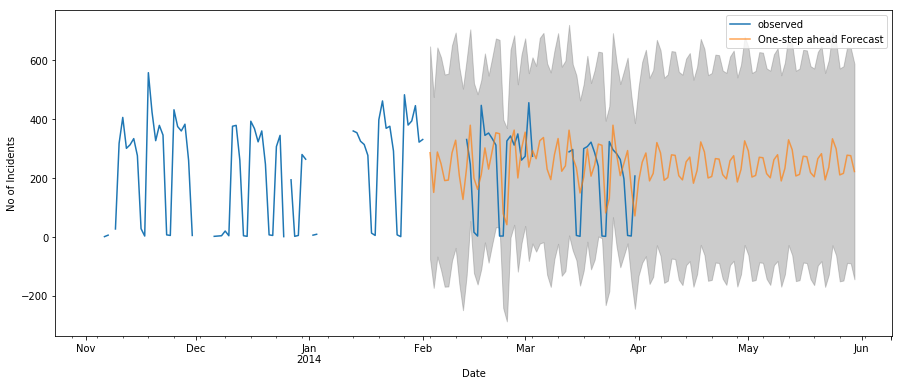

In [55]:
ax = data['2013':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7,figsize=(15, 6))

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='grey', alpha=.4)

ax.set_xlabel('Date')
ax.set_ylabel('No of Incidents')
plt.legend()

plt.show()